## AUTO REGRESSIVE Models

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models. 

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods. 

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models. 

### Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

**White noise of the residuals:**

White noise is a process of residuals $\epsilon_t$ that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive  (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. 
Auto-Regressive model with lag 1, AR(1) is given by 
* $Y_{t+1} = \beta Y_t + \epsilon_{t+1}$  and this same as
* $Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$  and this same as
* where $\epsilon_{t+1}$ is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation. 
 * $Y_{t+1} - \mu$ is interpreted as a deviation from mean value $mu$ and known as mean centered series.



The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. 
The null hypothesis is that time series is non-stationary.
Alternative hypothesis is that time series is stationary.

### AR Model indentification


### Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)

#### Autocorrelation Function (ACF)

**A plot of auto-correlation of different lags is called ACF.**

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

#### Partial Autocorrelation Function (PACF)

**A plot of partial auto-correlation for different values of lags is called PACF.**

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:
* The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero. 
* The auto-correlation function, $\rho_k$ decreases exponentially.

*  The model is AR of order p when the PACF cuts-off after a lag p.

*  The model is MA of order p when the ACF cuts-off after a lag q.

*  The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

* For an **ARIMA (p,d,q)** process, it becomes non-stationary to stationary after differencing it for **d** times.

#### Import the necessary libraries.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,8)
import itertools

#### Reading the data set in a Time Series with proper Time frequency or period.

In [3]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=True)

In [4]:
df['Year-Month'] = pd.to_datetime(df['Year-Month'])


In [5]:
df.set_index('Year-Month',inplace=True)

In [9]:
df.head()

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


# Ploting the Time Series Data.

<AxesSubplot:xlabel='Year-Month'>

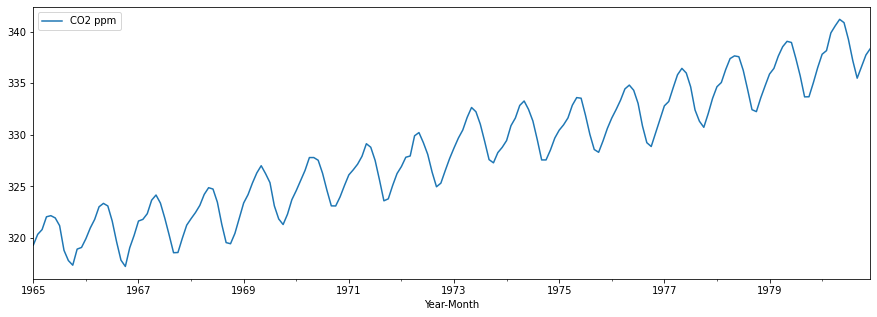

In [10]:
df.plot(figsize=(15,5))

# Ploting a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

<AxesSubplot:xlabel='Year-Month', ylabel='CO2 ppm'>

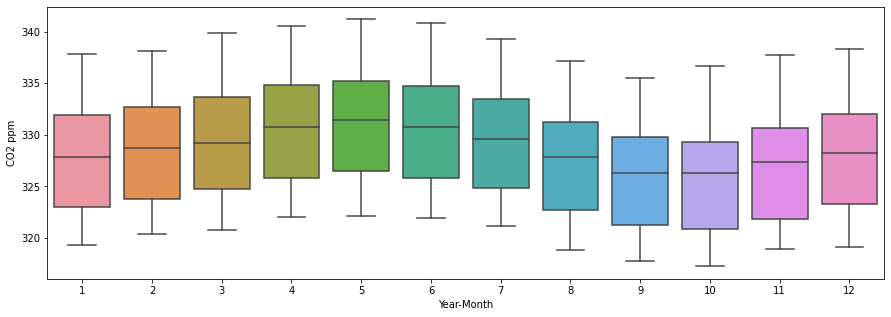

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(y = df['CO2 ppm'], x= pd.DatetimeIndex(df['Year-Month']).month,data = df )

# Ploting a boxplot to understand the variation of Carbon Dioxide in parts per million across years.

<AxesSubplot:xlabel='Year-Month', ylabel='CO2 ppm'>

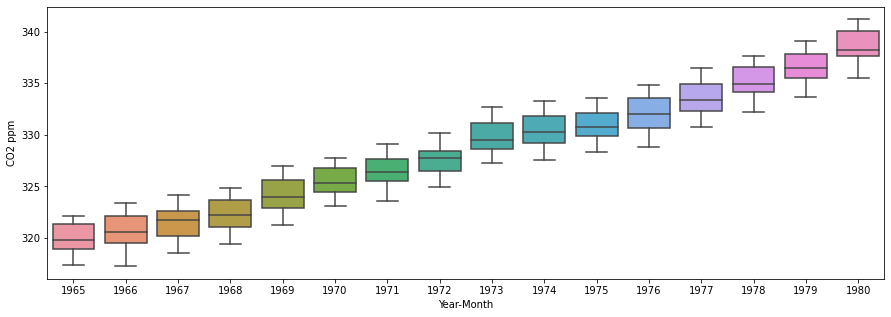

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(y = df['CO2 ppm'], x= pd.DatetimeIndex(df['Year-Month']).year,data = df )

# Ploting a graph of monthly Carbon Dioxide in parts per million across years.

<AxesSubplot:xlabel='Year-Month', ylabel='CO2 ppm'>

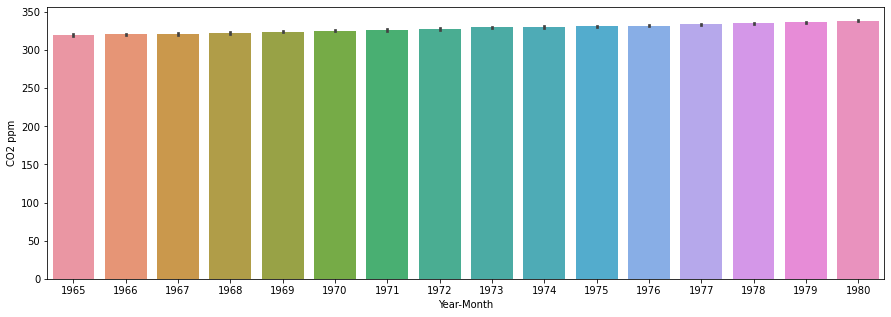

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(y = df['CO2 ppm'], x= pd.DatetimeIndex(df['Year-Month']).year,data = df )

In [54]:
df.set_index('Year-Month',inplace=True)

# Decompose the Time Series to understand the various components.

In [56]:
from statsmodels.tsa.seasonal import  seasonal_decompose
df_add_decompose = seasonal_decompose(df['CO2 ppm'], model = 'additive')

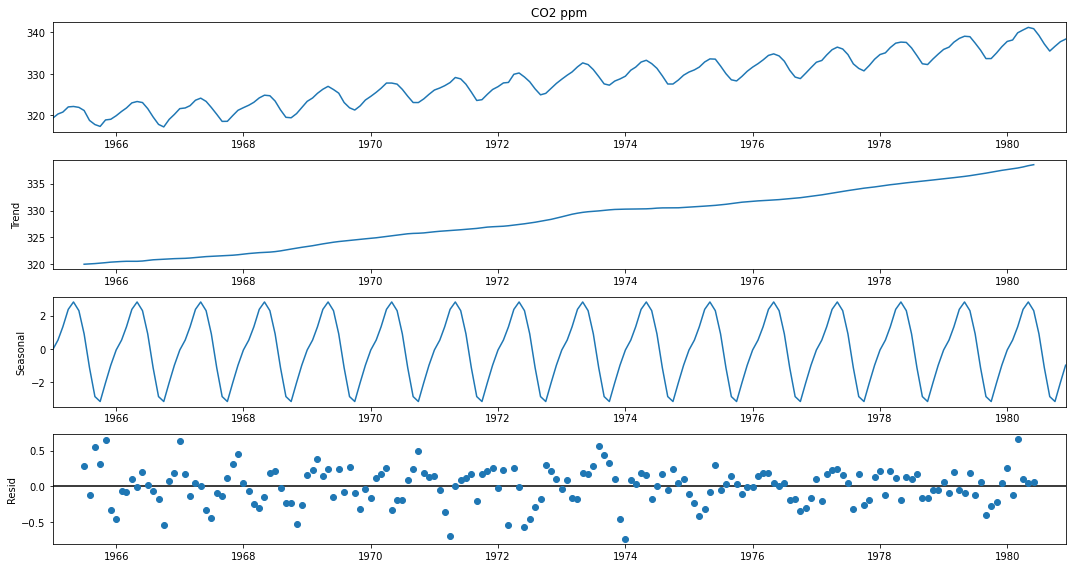

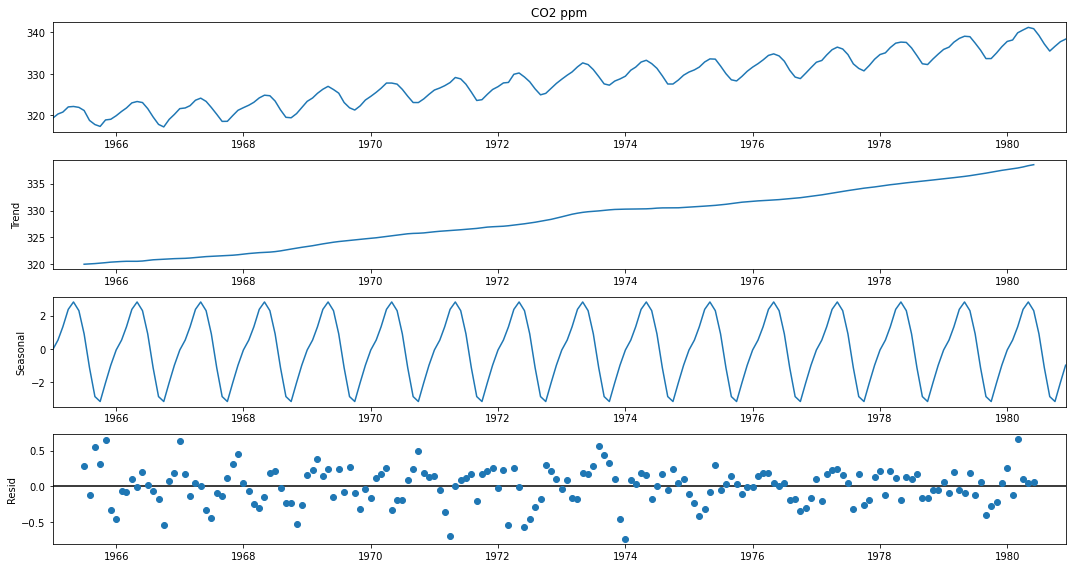

In [73]:
df_add_decompose.plot()

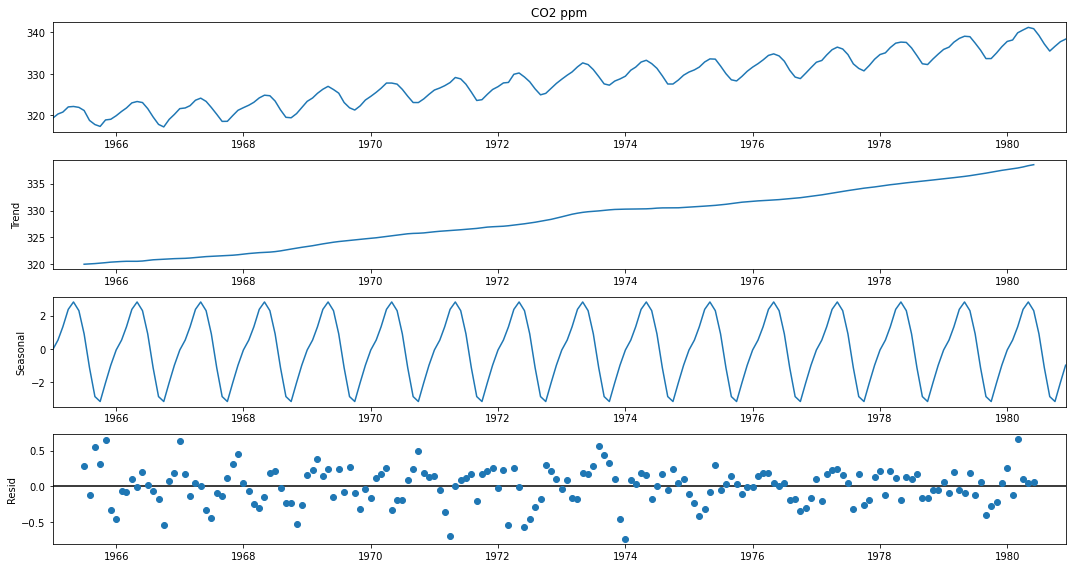

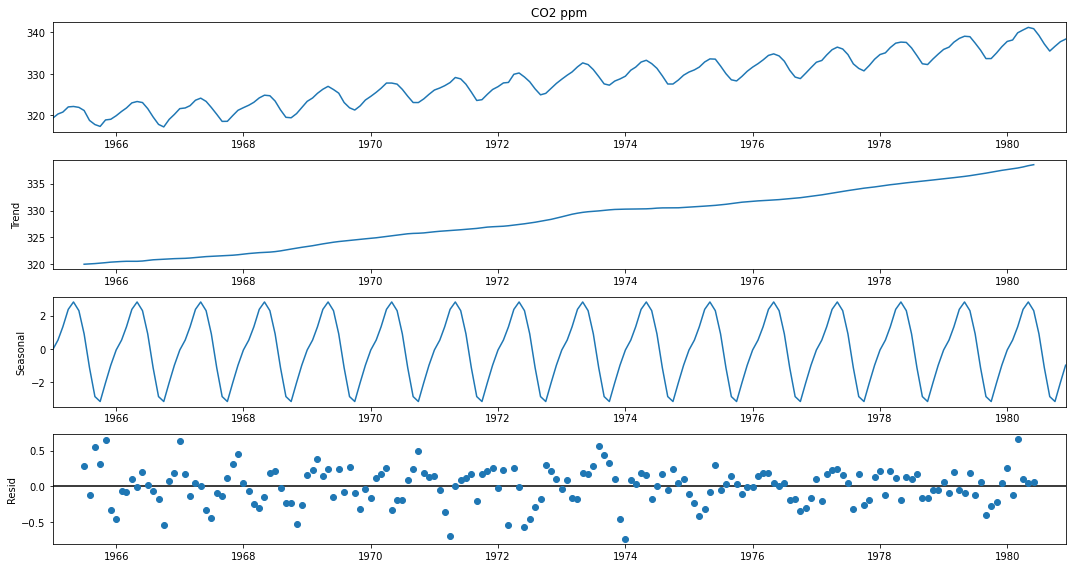

In [74]:
df_add_Multiplicative = seasonal_decompose(df['CO2 ppm'], model = 'Multiplicative')
df_add_Multiplicative.plot()

# Ploting a graph of the average and percentage change of Carbon Dioxide in parts per million across years.

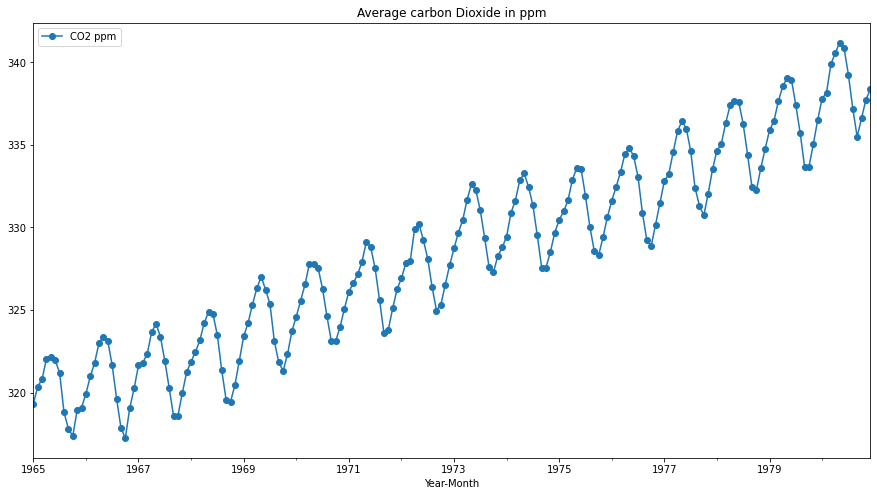

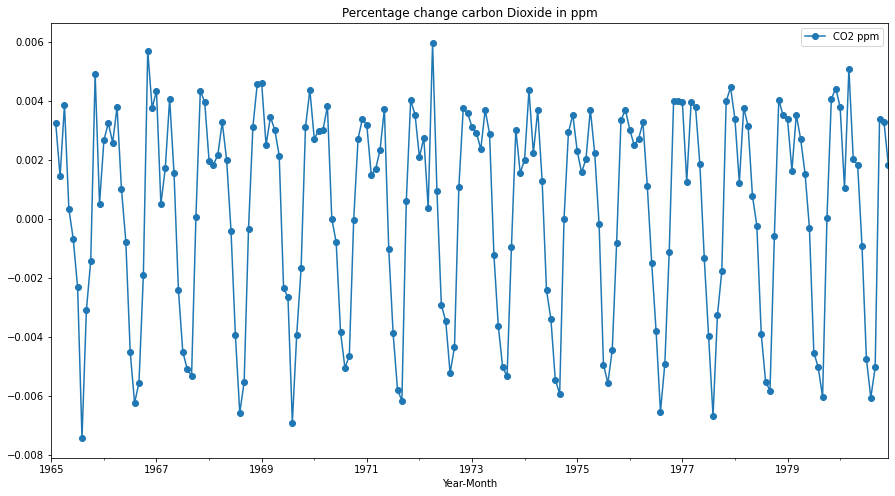

In [126]:
avg_co2 = df.groupby('Year-Month')["CO2 ppm"].mean()
pct_co2 = df.groupby('Year-Month')["CO2 ppm"].sum().pct_change()

avg_co2.plot(legend=True,marker='o',title="Average carbon Dioxide in ppm")
plt.show()
pct_co2.plot(legend=True,marker='o',title="Percentage change carbon Dioxide in ppm")
plt.show()

# Split the data into train and test. The first 75% of the data should be in training and last 25% of the data should be in test

In [6]:
train = df[0 : int(len(df)*0.75)]
test = df[int(len(df)*0.75): ]

# Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05. 
# If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at $\alpha$ = 0.05.

In [61]:
from statsmodels.tsa.stattools import adfuller
test_res = adfuller(df['CO2 ppm'])

In [71]:
ad = pd.DataFrame({'results':['T-stat','p-val','#lag-used','no.obs used','_','_']})
ad['val'] = test_res
ad

,results,val
0,T-stat,1.269677
1,p-val,0.996434
2,#lag-used,12
3,no.obs used,179
4,_,"{'1%': -3.4674201432469816, '5%': -2.877826051..."
5,_,144.00145


from the above the p-value is > 0.05, therefore the data is not stationary

In [79]:
np.log(df['CO2 ppm'])

test_res = adfuller(np.log(df['CO2 ppm']))
ad = pd.DataFrame({'results':['T-stat','p-val','#lag-used','no.obs used','_','_']})
ad['val'] = test_res
ad

,results,val
0,T-stat,1.116228
1,p-val,0.995353
2,#lag-used,12
3,no.obs used,179
4,_,"{'1%': -3.4674201432469816, '5%': -2.877826051..."
5,_,-1895.816019


In [151]:
co2_log = np.log(df['CO2 ppm'])

In [152]:
co2_log_diff = co2_log - co2_log.shift(12)

<AxesSubplot:xlabel='Year-Month'>

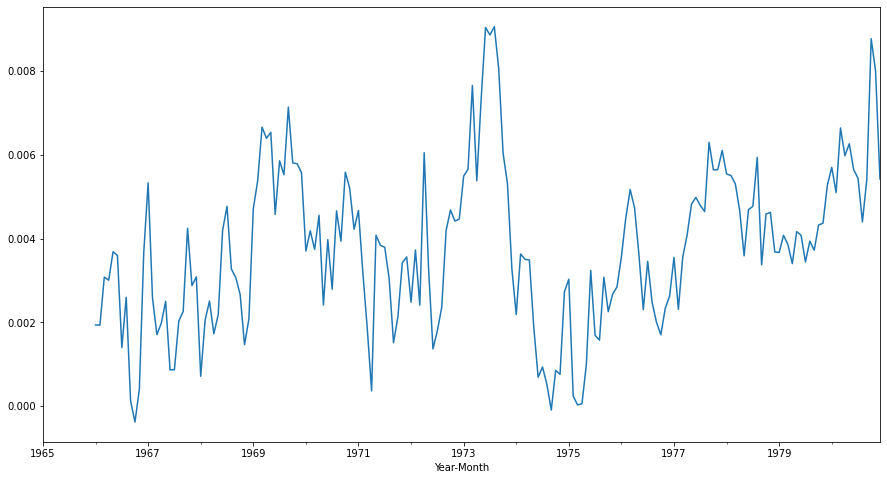

In [85]:
co2_log_diff.plot()

In [153]:
df['co2_log_diff'] = co2_log_diff

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year-Month    192 non-null    datetime64[ns]
 1   CO2 ppm       192 non-null    float64       
 2   co2_log_diff  180 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.6 KB


In [99]:
test_res = adfuller(df['co2_log_diff'][12:])
ad = pd.DataFrame({'results':['T-stat','p-val','#lag-used','no.obs used','_','_']})
ad['val'] = test_res
ad

,results,val
0,T-stat,-2.897302
1,p-val,0.045663
2,#lag-used,14
3,no.obs used,165
4,_,"{'1%': -3.470616369591229, '5%': -2.8792214018..."
5,_,-1791.349817


the p-value is less than .05 so the series is stationary


##### Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

# Check the ACF and PACF of the training data.

In [100]:
from statsmodels.tsa.stattools import acf,pacf

In [109]:
train.head()

,CO2 ppm,co2_log_diff
Year-Month,,
1965-01-01,319.32,NaN
1965-02-01,320.36,NaN
1965-03-01,320.82,NaN
1965-04-01,322.06,NaN
1965-05-01,322.17,NaN


In [110]:
acf(train['co2_log_diff'][12:])

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.77321863,  0.61317654,  0.46283823,  0.40055585,
        0.36724851,  0.32095558,  0.28292641,  0.25391202,  0.21104385,
        0.07494101, -0.03379361, -0.21582983, -0.164988  , -0.12236669,
       -0.10945391, -0.11634906, -0.13831414, -0.16940235, -0.22972694,
       -0.30242903, -0.32273887, -0.28973303, -0.28625982, -0.18524732,
       -0.16025695, -0.13405184, -0.10623724, -0.09622329, -0.12426033,
       -0.11249613, -0.04618628,  0.021473  ,  0.05071135,  0.02575744,
        0.02473949, -0.03499646, -0.02734903, -0.03571252, -0.03530721,
       -0.01779375])

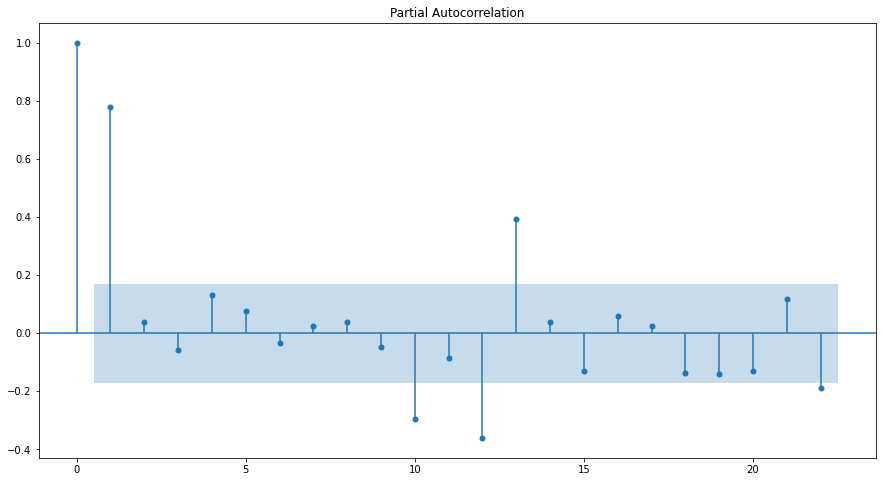

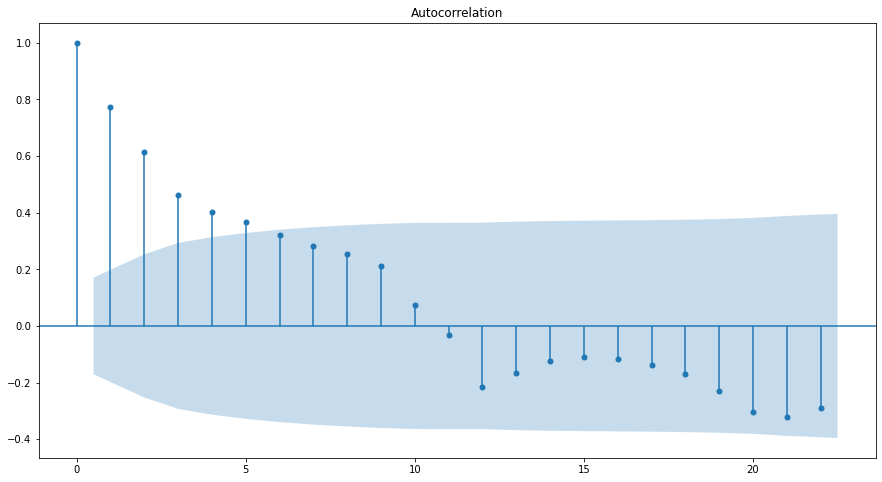

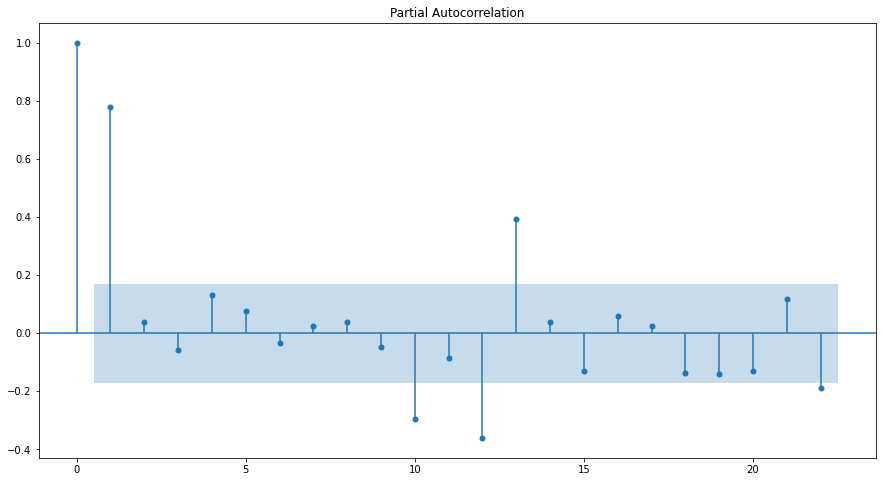

In [111]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(train['co2_log_diff'][12:])
sm.graphics.tsa.plot_pacf(train['co2_log_diff'][12:])


# Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p and q to be between 0 and 2]

In [7]:
import pmdarima as pm
def arimamodel(ts):
    automodel = pm.auto_arima(ts, start_p=0,
                              start_q=0,
                              max_p=2,
                              max_q=2,
                              test='adf',
                              seasonal=True,
                              trace=True)

In [9]:
model = arimamodel(train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=842.738, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=452.987, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=665.405, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2077.268, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=351.156, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=339.446, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=371.410, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=328.609, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=339.168, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=349.638, Time=0.18 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.202 seconds


In [10]:
model = ARIMA(train, order=(2,0,2))
result = model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [12]:
pred = result.forecast(len(test))

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
from sklearn import metrics
RMSE = metrics.mean_squared_error(test['CO2 ppm'],pred[0],squared=False)
MAPE = metrics.mean_absolute_percentage_error(test['CO2 ppm'],pred[0])
result = pd.DataFrame({'Test RMSE' : [RMSE],'Test MAPE' : [MAPE]},index = [' Auto ARIMA model'] )
result

,Test RMSE,Test MAPE
Auto ARIMA model,9.730511,0.026764


# Check for stationarity on the whole data and stationarize the data if needed. Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.
### Note: Stationarity is to be checked with the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05.

In [22]:
from statsmodels.tsa.stattools import adfuller
test_res = adfuller(df['CO2 ppm'])
ad = pd.DataFrame({'results':['T-stat','p-val','#lag-used','no.obs used','_','_']})
ad['val'] = test_res
ad

,results,val
0,T-stat,1.269677
1,p-val,0.996434
2,#lag-used,12
3,no.obs used,179
4,_,"{'1%': -3.4674201432469816, '5%': -2.877826051..."
5,_,144.00145


In [ ]:
its not stationary as the p-value is > 0.05

In [25]:
log_val = np.log(df['CO2 ppm'])
log_val

Year-Month
1965-01-01    5.766194
1965-02-01    5.769445
1965-03-01    5.770880
1965-04-01    5.774738
1965-05-01    5.775079
                ...   
1980-08-01    5.820647
1980-09-01    5.815592
1980-10-01    5.818984
1980-11-01    5.822276
1980-12-01    5.824110
Name: CO2 ppm, Length: 192, dtype: float64

In [28]:
shift_val = log_val - log_val.shift(12)
# df
shift_val

Year-Month
1965-01-01         NaN
1965-02-01         NaN
1965-03-01         NaN
1965-04-01         NaN
1965-05-01         NaN
                ...   
1980-08-01    0.004399
1980-09-01    0.005410
1980-10-01    0.008772
1980-11-01    0.007997
1980-12-01    0.005423
Name: CO2 ppm, Length: 192, dtype: float64

In [30]:
test_res = adfuller(shift_val[12:])
ad = pd.DataFrame({'results':['T-stat','p-val','#lag-used','no.obs used','_','_']})
ad['val'] = test_res
ad

,results,val
0,T-stat,-2.897302
1,p-val,0.045663
2,#lag-used,14
3,no.obs used,165
4,_,"{'1%': -3.470616369591229, '5%': -2.8792214018..."
5,_,-1791.349817


In [ ]:
p-value is < 0.05 so it is stationary

In [ ]:
import pmdarima as pm
def arimamodel(ts):
    automodel = pm.auto_arima(ts, start_p=0,
                              start_q=0,
                              max_p=2,
                              max_q=2,
                              test='adf',
                              seasonal=False,
                              trace=True)

In [33]:
model = arimamodel(shift_val[12:])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1881.912, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1884.637, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1885.844, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1883.865, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1892.146, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1875.912, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1887.480, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1886.945, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1883.749, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1888.375, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1894.007, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1887.754, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1886.561, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1877.868, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0

In [34]:
model = ARIMA(shift_val[12:], order=(1,1,1))
result = model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

# Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [35]:
pred = result.forecast(steps=24)

In [43]:
log_org_val = log_val[-24:] + pred[0]

In [44]:
org_val = np.exp(log_org_val)

In [61]:
org_val.values

array([337.6776903 , 338.20137164, 339.37575405, 340.27438157,
       340.78546699, 340.66683695, 339.11370664, 337.40190431,
       335.36008047, 335.36978226, 336.73724695, 338.2260751 ,
       339.51449307, 339.86868306, 341.6001648 , 342.29672869,
       342.92316324, 342.60499123, 340.98031038, 338.91344505,
       337.20845501, 338.35806491, 339.4775919 , 340.10465321])

In [73]:
forcasted_dates = pd.date_range(start='1981-01-01',periods=len(org_val),freq='M')
fr_d = pd.DataFrame()
fr_d['Date']=forcasted_dates
fr_d['CO2 ppm'] = org_val.values

In [74]:
fr_d.set_index('Date',inplace=True)

In [79]:
df.index

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '1980-03-01', '1980-04-01', '1980-05-01', '1980-06-01',
               '1980-07-01', '1980-08-01', '1980-09-01', '1980-10-01',
               '1980-11-01', '1980-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=192, freq=None)

In [78]:
fr_d.index

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31', '1981-11-30', '1981-12-31',
               '1982-01-31', '1982-02-28', '1982-03-31', '1982-04-30',
               '1982-05-31', '1982-06-30', '1982-07-31', '1982-08-31',
               '1982-09-30', '1982-10-31', '1982-11-30', '1982-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

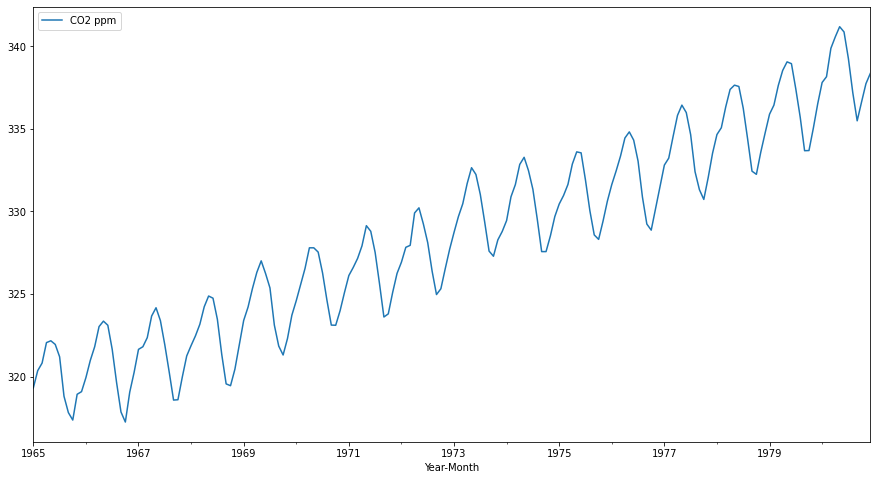

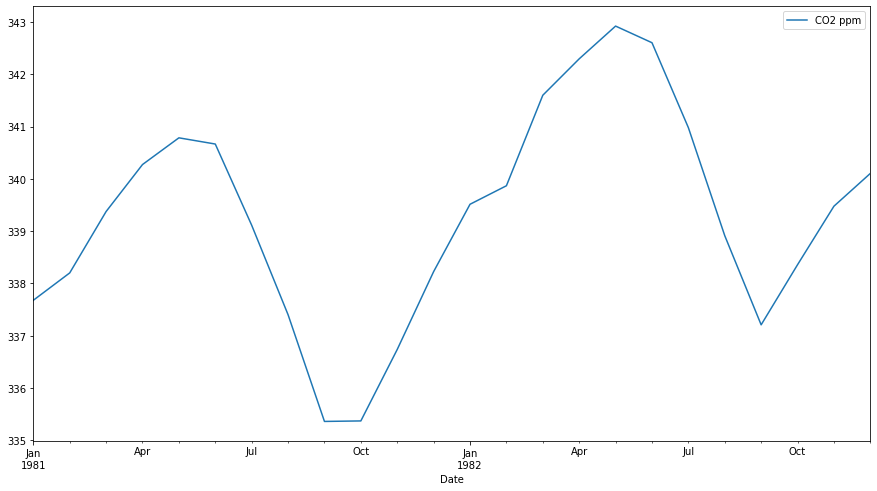

In [77]:
df.plot()
fr_d.plot()
plt.show()

# Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [100]:
import pmdarima as pm
def sarimamodel(ts):
    automodel = pm.auto_arima(ts, start_p=0,
                              start_q=0,
                              max_p=2,
                              max_q=2,
                              start_P=0,
                              start_Q=0,
                              max_P=2,
                              max_Q=2,                      
                              seasonal=True,
                              trace=True)

In [101]:
model = sarimamodel(train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=445.908, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=354.481, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=365.315, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=444.712, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=322.507, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=339.785, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=320.973, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=352.772, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=285.001, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=338.107, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=286.520, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=327.252, Time=0.07 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 0.587 seconds


# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [124]:
import statsmodels.api as sm
best_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 0),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [125]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -138.500
Date:                Tue, 26 Apr 2022   AIC                            285.001
Time:                        12:59:02   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

In [126]:
pred = best_results.get_prediction(start=pd.to_datetime('1977-01-01'), dynamic=True, full_results=True)

In [127]:
pred_ci = pred.conf_int()

In [128]:
predN = best_results.get_forecast(steps=48, alpha=0.1)

In [129]:
co2_forecasted = pred.predicted_mean

In [130]:
test['forecasted'] = predN.predicted_mean.values

<ipython-input-130-38a9b3721652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecasted'] = predN.predicted_mean.values


In [131]:
test.head()

,CO2 ppm,forecasted
Year-Month,,
1977-01-01,332.81,332.717760
1977-02-01,333.23,333.487604
1977-03-01,334.55,333.657146
1977-04-01,335.82,333.279400
1977-05-01,336.44,332.561515


In [132]:
RMSE = metrics.mean_squared_error(test['CO2 ppm'],test['forecasted'],squared=False)
MAPE = metrics.mean_absolute_percentage_error(test['CO2 ppm'],test['forecasted'])
result = pd.DataFrame({'Test RMSE' : [RMSE],'Test MAPE' : [MAPE]},index = [' Auto SARIMA model'] )
result

,Test RMSE,Test MAPE
Auto SARIMA model,4.753884,0.011926


# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [ ]:
df.drop('forecasted',axis=1,inplace=True)

In [138]:
 best_model = sm.tsa.statespace.SARIMAX(df,
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 0),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [139]:
pred = best_results.forecast(steps=24)

<AxesSubplot:xlabel='Year-Month'>

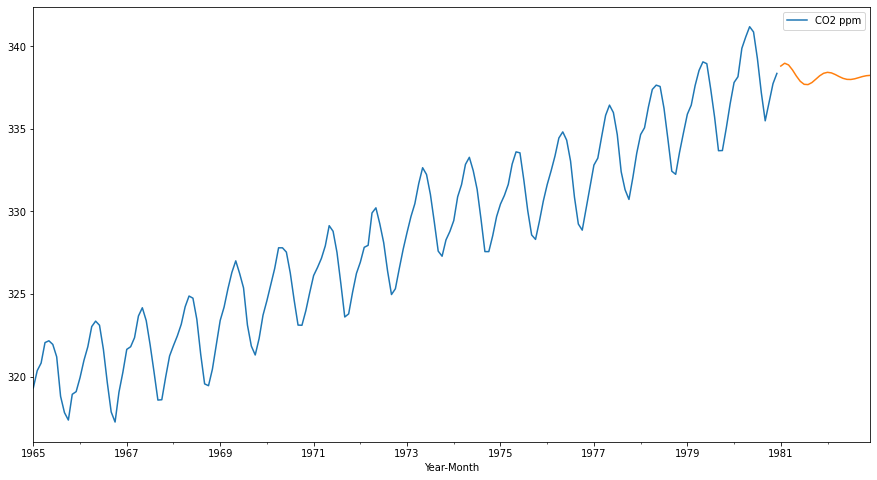

In [142]:
df.plot()
pred.plot()

# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model. Consider a degree of differencing on the Seasonal scale as well.

In [143]:
 best_model = sm.tsa.statespace.SARIMAX(df,
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,)
best_results = best_model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [150]:
pred =best_results.forecast(len(test))

In [151]:
RMSE = metrics.mean_squared_error(test['CO2 ppm'],pred,squared=False)
MAPE = metrics.mean_absolute_percentage_error(test['CO2 ppm'],pred)
result = pd.DataFrame({'Test RMSE' : [RMSE],'Test MAPE' : [MAPE]},index = [' Auto SARIMA model with seasonal differnce'] )
result

,Test RMSE,Test MAPE
Auto SARIMA model with seasonal differnce,3.385313,0.008239


# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [152]:
best_model = sm.tsa.statespace.SARIMAX(df,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

<AxesSubplot:xlabel='Year-Month'>

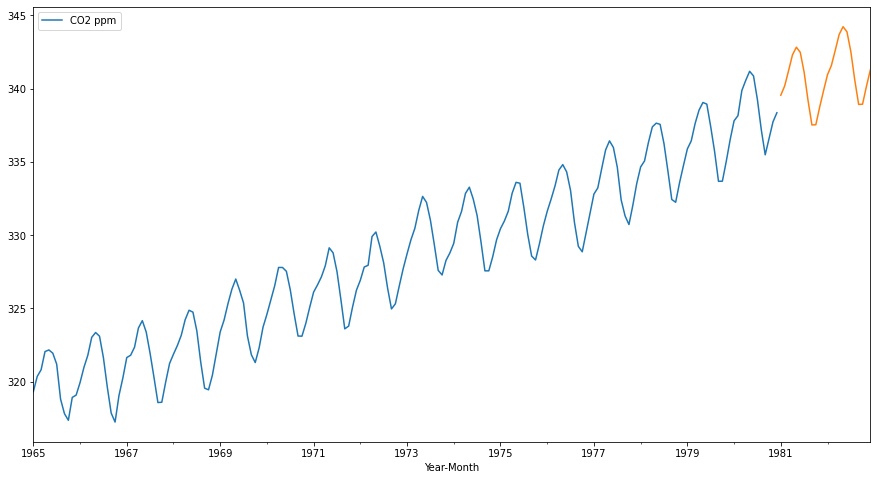

In [153]:
pred = best_results.forecast(steps=24)
df.plot()
pred.plot()


In [154]:

n_steps = 24
pred_uc_99 = best_results.get_forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=24, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [156]:
n_steps = 36

idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([ pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([ pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']]# just reordering 
#columns

fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1980-12-01,339.555293,338.931936,340.178651,338.931936,340.178651
1981-01-01,340.188165,339.412307,340.964023,339.412307,340.964023
1981-02-01,341.230344,340.327384,342.133304,340.327384,342.133304
1981-03-01,342.307541,341.293283,343.321798,341.293283,343.321798
1981-04-01,342.835540,341.721045,343.950035,341.721045,343.950035


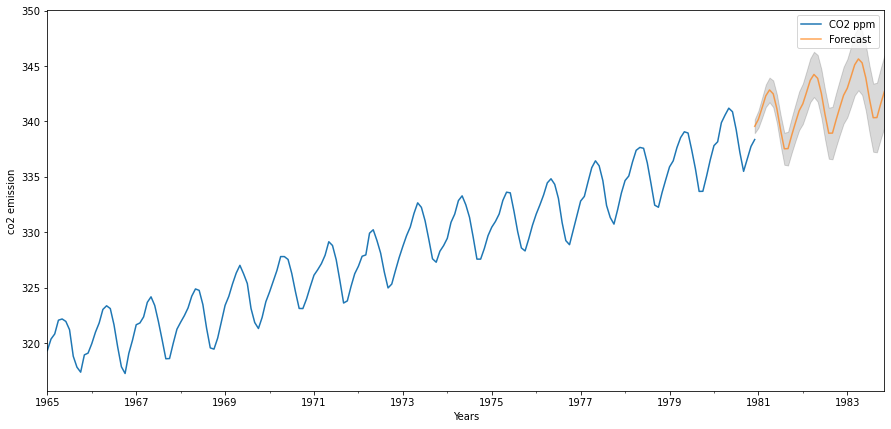

In [159]:
axis = df.plot(label='Observed', figsize=(15, 7))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('co2 emission')
plt.legend(loc='best')
plt.show()